In [1]:
from sequenzo import *
import pandas as pd

## 

In [2]:
# ------------------------
# Step 0: ÂÆö‰πâÊèêÂèñÂ∑•ÂÖ∑ÂáΩÊï∞
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: ËØªÂèñÂíåÂáÜÂ§áÊï∞ÊçÆ
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# ÂÅáËÆæ 'country' ÊòØ‰∏ÄÂàóÔºåÂÄº‰∏∫ 'India' Êàñ 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # ‰∏ÄËà¨ÊòØÂõ∫ÂÆö 10

# ÊèêÂèñ sequence Âàó
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: ÊûÑÂª∫ÂâçÁºÄÊ†ë
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# ‰∏∫ÊØè‰∏™ÂõΩÂÆ∂ÂàÜÂà´Âª∫Ê®°
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
print('india_tree:', india_tree)
print('us_tree:', us_tree)

india_tree: PrefixTree(max_depth=10, total_prefixes=5804)
us_tree: PrefixTree(max_depth=10, total_prefixes=5517)


In [4]:
df

worker_id  gender country                  cohort  \
0          dilip-kumar-nath-7538746a    male   india  11-20 total work years   
1         vinodkumar-yadav-b7a976107    male   india  11-20 total work years   
2               josh-slosson-07a1509    male   india  11-20 total work years   
3      jonatthan-rodriguez-8a5612121    male   india  11-20 total work years   
4       jeenesh-jyothindran-8ba28818    male   india  11-20 total work years   
...                              ...     ...     ...                     ...   
38897             nan-jiang-743a9863  female      us   0-10 total work years   
38898              tina-pava-4846207  female      us  21-30 total work years   
38899                     sariandoni  female      us  21-30 total work years   
38900            nancy-jain-a8723460  female      us   0-10 total work years   
38901       christy-garner-677894213  female      us  21-30 total work years   

                   C1              C2              C3              C4  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
38897        software        software        software        software   
38898        software        software        software        software   
38899  support & test        software        software        software   
38900        software        software        software        software   
38901  support & test  support & test  support & test  support & test   

                   C5              C6              C7              C8  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
38897        software        software        software        software   
38898        software        software        software        software   
38899        software        software        software        research   
38900        software  support & test        software        software   
38901  support & test  support & test  support & test  support & test   

                   C9             C10  
0            software        software  
1            software        software  
2            software        software  
3            software        software  
4            software        software  
...               ...             ...  
38897        software        software  
38898        software        software  
38899        research        research  
38900        software        software  
38901  support & test  support & test  

[38902 rows x 14 columns]

In [5]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

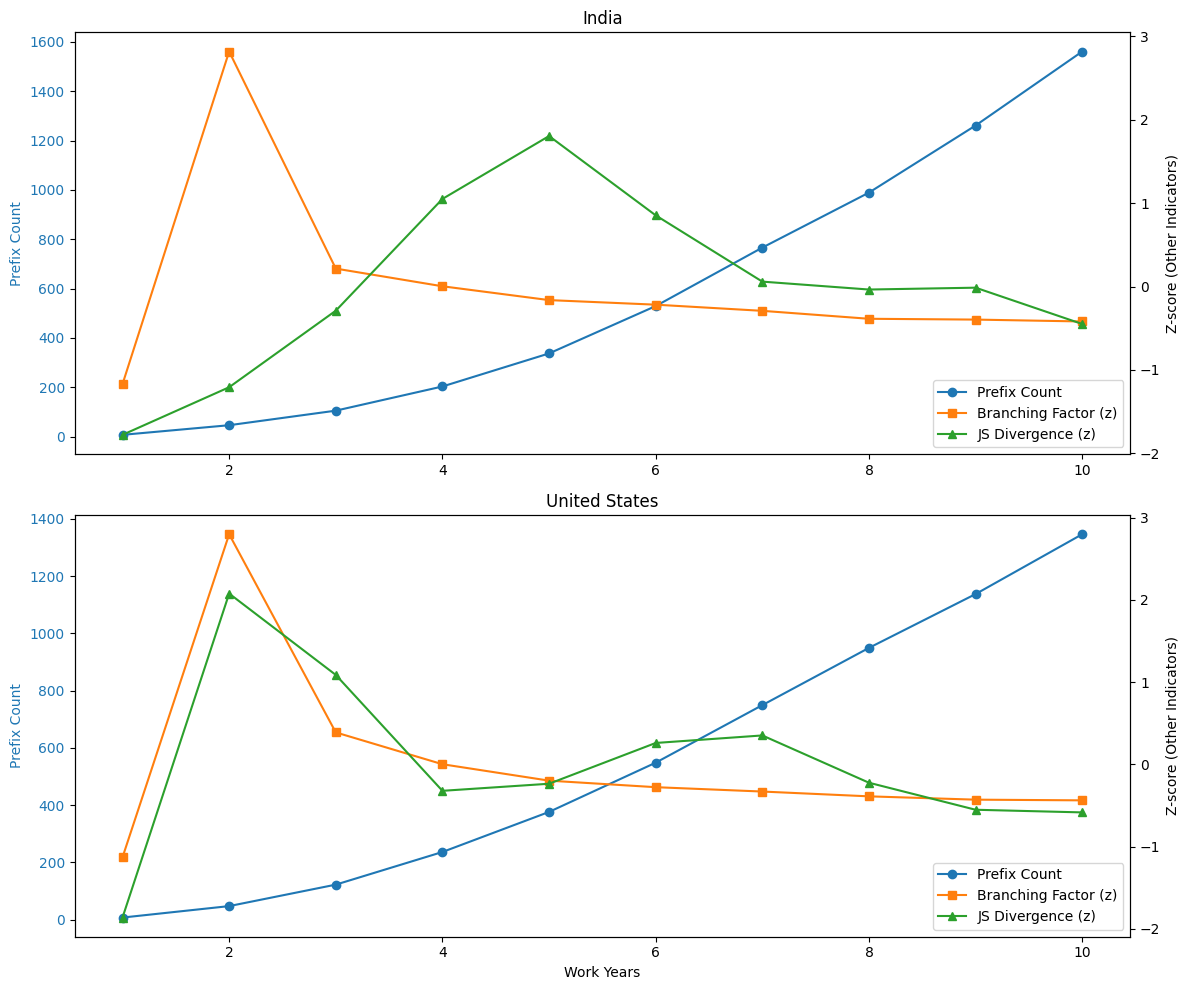

‚úÖ Â∑≤ÁîüÊàêÂ∏¶ÊúâËá™ÂÆö‰πâÊ†áÈ¢òÁöÑÂØπÊØîÂõæ


<Figure size 640x480 with 0 Axes>

In [6]:
# ÊºîÁ§∫Ëá™ÂÆö‰πâÂ≠êÂõæÊ†áÈ¢òÂäüËÉΩ
# ‰ΩøÁî®ÂÆåÂÖ®Ëá™ÂÆö‰πâÁöÑÊ†áÈ¢ò

# ÂáÜÂ§á‰∏§ÁªÑÊï∞ÊçÆ
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_scores": india_js_scores
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_scores": us_js_scores
    }
}

# ‰ΩøÁî®Ëá™ÂÆö‰πâÂ≠êÂõæÊ†áÈ¢ò
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # Ëøô‰∏™‰ªÖÁî®‰∫éÈªòËÆ§Ê†áÈ¢òÊ†ºÂºèÔºåÂΩìÊúâsubplot_titlesÊó∂‰ºöË¢´Ë¶ÜÁõñ
    subplot_titles=[
        "India", 
        "United States"
    ],  # ÂÆåÂÖ®Ëá™ÂÆö‰πâÁöÑÂ≠êÂõæÊ†áÈ¢ò
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # ÂèØ‰ª•ÊòØÂπ¥‰ªΩ„ÄÅÊó∂ÊúüÁ≠â
    x_label="Work Years",  # Ëá™ÂÆö‰πâxËΩ¥Ê†áÁ≠æ
    legend_loc='lower right',  # Âõæ‰æã‰ΩçÁΩÆ
    save_as="prefix_system_indicators_comparison"
)

print("‚úÖ Â∑≤ÁîüÊàêÂ∏¶ÊúâËá™ÂÆö‰πâÊ†áÈ¢òÁöÑÂØπÊØîÂõæ")


In [7]:
# ------------------------
# Step 4: ËÆ°ÁÆó‰∏™‰ΩìÂ±ÇÊåáÊ†á
# ------------------------

# ËµãÂÄºÂõû dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["first_divergence_year"] = india_model.compute_first_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["first_divergence_year"] = us_model.compute_first_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# ÂêàÂπ∂ÂõûÊÄªÊï∞ÊçÆ
df = pd.concat([india_df, us_df], ignore_index=True)

In [8]:
df

worker_id  gender country                  cohort  \
0          dilip-kumar-nath-7538746a    male   india  11-20 total work years   
1         vinodkumar-yadav-b7a976107    male   india  11-20 total work years   
2               josh-slosson-07a1509    male   india  11-20 total work years   
3      jonatthan-rodriguez-8a5612121    male   india  11-20 total work years   
4       jeenesh-jyothindran-8ba28818    male   india  11-20 total work years   
...                              ...     ...     ...                     ...   
38897             nan-jiang-743a9863  female      us   0-10 total work years   
38898              tina-pava-4846207  female      us  21-30 total work years   
38899                     sariandoni  female      us  21-30 total work years   
38900            nancy-jain-a8723460  female      us   0-10 total work years   
38901       christy-garner-677894213  female      us  21-30 total work years   

                   C1              C2              C3              C4  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
38897        software        software        software        software   
38898        software        software        software        software   
38899  support & test        software        software        software   
38900        software        software        software        software   
38901  support & test  support & test  support & test  support & test   

                   C5              C6              C7              C8  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
38897        software        software        software        software   
38898        software        software        software        software   
38899        software        software        software        research   
38900        software  support & test        software        software   
38901  support & test  support & test  support & test  support & test   

                   C9             C10  diverged  first_divergence_year  \
0            software        software         0                    NaN   
1            software        software         0                    NaN   
2            software        software         0                    NaN   
3            software        software         0                    NaN   
4            software        software         0                    NaN   
...               ...             ...       ...                    ...   
38897        software        software         0                    NaN   
38898        software        software         0                    NaN   
38899        research        research         1                    3.0   
38900        software        software         1                    6.0   
38901  support & test  support & test         0                    NaN   

       prefix_rarity_score  path_uniqueness  
0                 7.070030                0  
1                 7.070030                0  
2                 7.070030                0  
3                 7.070030                0  
4                 7.070030                0  
...                    ...              ...  
38897             4.528812                0  
38898             4.528812                0  
38899    

First divergence Year Êü±Áä∂ÂõæÂØπÊØî

first_divergence_year ÊòØ‰∏Ä‰∏™‰∫ã‰ª∂ÂèòÈáèÔºåÂè™Âú® diverged == 1 ÁöÑ‰∏™‰Ωì‰∏äÊúâÊÑè‰πâÔºåÂõ†Ê≠§Âú® diverged == 0 ÁöÑË°å‰∏≠‰∏∫ NaN ÊòØÂÆåÂÖ®ÂêàÁêÜÁöÑ„ÄÇ

‰∏∫‰∫ÜÈÅøÂÖçÂõæÂÉèËØØÂØºÊàñÊä•ÈîôÔºåÊàë‰ª¨Âú®ÂèØËßÜÂåñÊó∂Â∫îËØ•Ôºö

* ‰ªÖÁªòÂà∂Èùû NaN ÁöÑ divergence_year

* Âπ∂Âå∫ÂàÜÂõΩÂÆ∂‰ª•‰æøÂØπÊØî

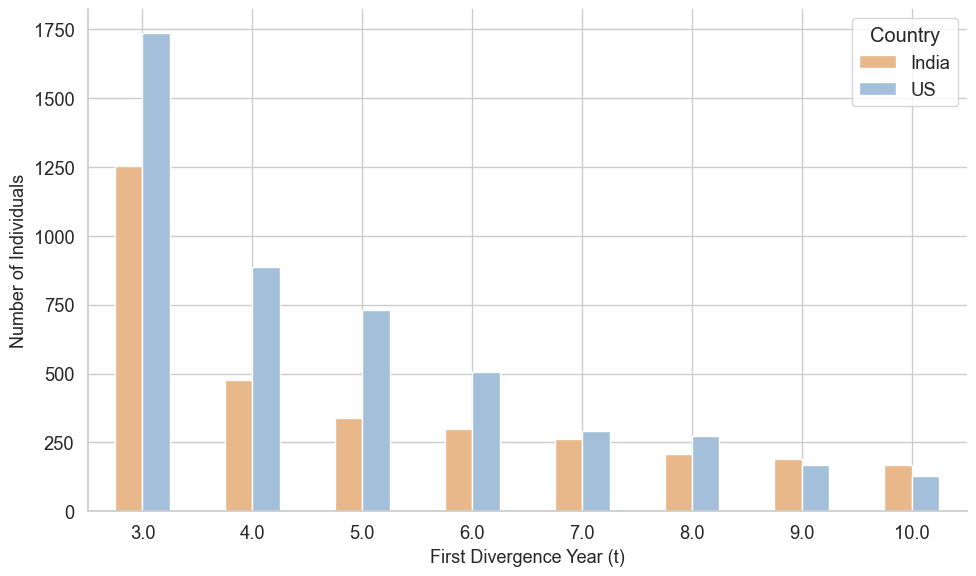

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Âè™‰øùÁïô diverged ‰∏™‰Ωì
diverged_df = df[df["diverged"] == 1].copy()

# ÂàÜÂõΩÂÆ∂ËÆ°Êï∞
vc_divergence = diverged_df.groupby("country")["first_divergence_year"].value_counts().unstack().fillna(0).T

# ÈáçÂëΩÂêçÂàó‰∏∫ÊÉ≥Ë¶ÅÁöÑÂõæ‰æãÊ†áÁ≠æ
vc_divergence = vc_divergence.rename(columns={"india": "India", "us": "US"})

# ËÆæÁΩÆÁîªÂ∏É
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

india_color = "#E8B88A"
us_color = "#A3BFD9"

# ÁªòÂõæÔºàÂ†ÜÂè†ÊàñÂπ∂Êéí‰ªªÈÄâÔºâÔºåËé´Â•àÊüîËâ≤Ë∞É
vc_divergence.plot(
    kind="bar",
    ax=ax,
    color=[india_color, us_color]  # Monet-style: India / US
    # color=["#A6C1A9", "#C6A5CF"], # Ëñ∞Ë°£ËçâÊê≠ÈÖçÈ¢úËâ≤
)

# ËÆæÁΩÆÊ†áÈ¢ò‰∏éÊ†áÁ≠æ
# ax.set_title("Divergence Year Distribution by Country", fontsize=16)
ax.set_xlabel("First Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.savefig("First Divergence Year Distribution by Country", 
            dpi=300, 
            bbox_inches='tight')
plt.show()

Prefix Rarity Score ÂàÜÂ∏É KDE ÂØπÊØî

ÂÖàÂØπ prefix rarity score ÂÅö z-score Ê†áÂáÜÂåñÔºåÁÑ∂ÂêéÂú®Âõæ‰∏≠ÁîªÂá∫ z = 1.5 ÂØπÂ∫îÁöÑ‰ΩçÁΩÆÔºàÂç≥ÔºöÊ†áÂáÜÂåñÂêéÁöÑÂÄº‰∏∫ 1.5 ÁöÑ‰ΩçÁΩÆÔºåÂú®ÂéüÂßãÊï∞ÊçÆ‰∏≠ÁöÑÂØπÂ∫îÂÄºÔºâ„ÄÇ

Ê≠•È™§ÈÄªËæëÔºö
1. ËÆ°ÁÆóÊØèÁªÑ prefix rarity score ÁöÑÊï¥‰ΩìÂùáÂÄº‰∏éÊ†áÂáÜÂ∑ÆÔºõ
2. ‰ΩøÁî®Ëøô‰∫õÂèÇÊï∞ÊääÊï¥‰∏™Êï∞ÊçÆ z-score Ê†áÂáÜÂåñÔºõ
3. ËÆ°ÁÆó z = 1.5 ÂØπÂ∫îÁöÑÂéüÂßãÂÄºÔºõ
4. Âú®ÂéüÂõæ‰∏≠Âä†‰∏ÄÊù°Á´ñÁ∫øÊòæÁ§∫Ëøô‰∏™ÈòàÂÄº‰ΩçÁΩÆ„ÄÇ

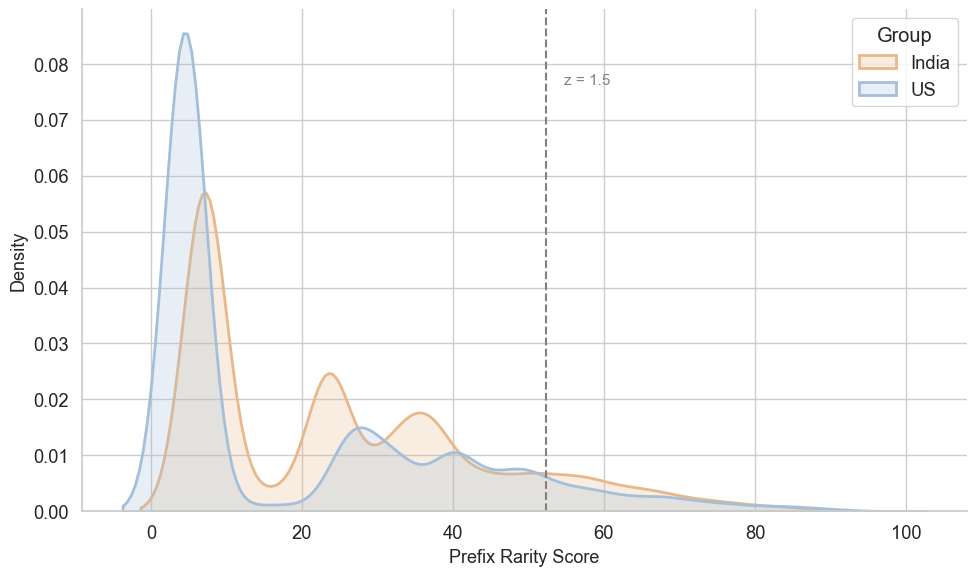

üìä ÁªüËÆ°‰ø°ÊÅØ: {'mean': 21.758999842691928, 'std': 20.370214118851933, 'threshold_value': 52.31432102096983, 'z_threshold': 1.5}


In [10]:
# üéâ ‰ΩøÁî®Êñ∞ÁöÑÈÄöÁî®ÂèØËßÜÂåñÂáΩÊï∞ÔºÅ
# ÊºîÁ§∫ plot_prefix_rarity_distribution ÁöÑÂêÑÁßçÁî®Ê≥ï

# È¶ñÂÖàÈáçÊñ∞ÂØºÂÖ•‰ª•Ëé∑ÂèñÊñ∞ÂáΩÊï∞
from sequenzo import plot_prefix_rarity_distribution

# Á§∫‰æã1ÔºöÂ§öÁªÑÂØπÊØîÔºåÂ∏¶ÈòàÂÄºÁ∫øÔºà‰Ω†Áé∞Âú®Ê≠£Âú®‰ΩøÁî®ÁöÑÊïàÊûúÔºâ
data_dict = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist()
}

stats = plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=True,
    z_threshold=1.5,
    save_as="rarity_distribution_with_threshold"
)

print("üìä ÁªüËÆ°‰ø°ÊÅØ:", stats)


Á§∫‰æã2Ôºö‰∏çÊòæÁ§∫ÈòàÂÄºÁ∫ø


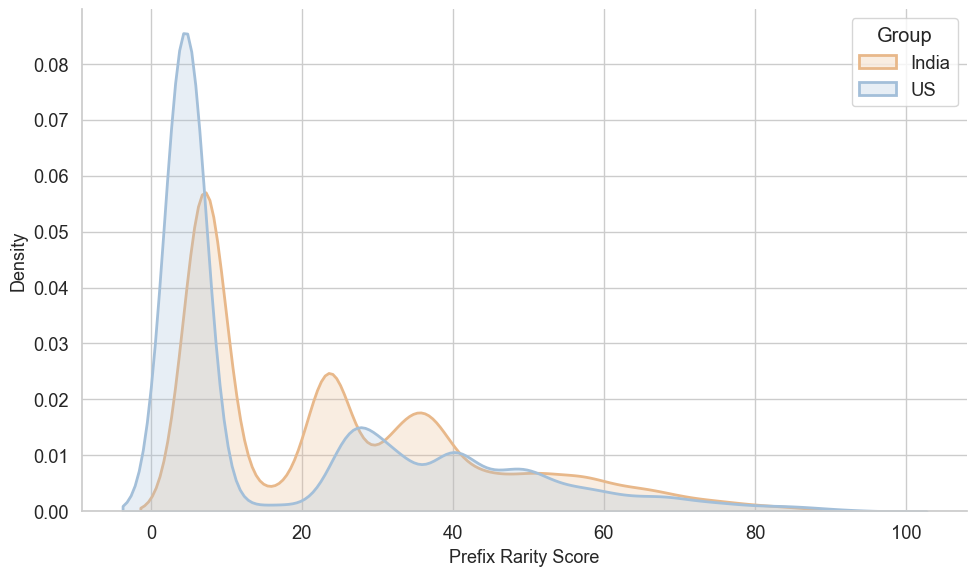


Á§∫‰æã3ÔºöÂçïÁªÑÂàÜÊûêÔºà‰ªÖÂç∞Â∫¶Ôºâ


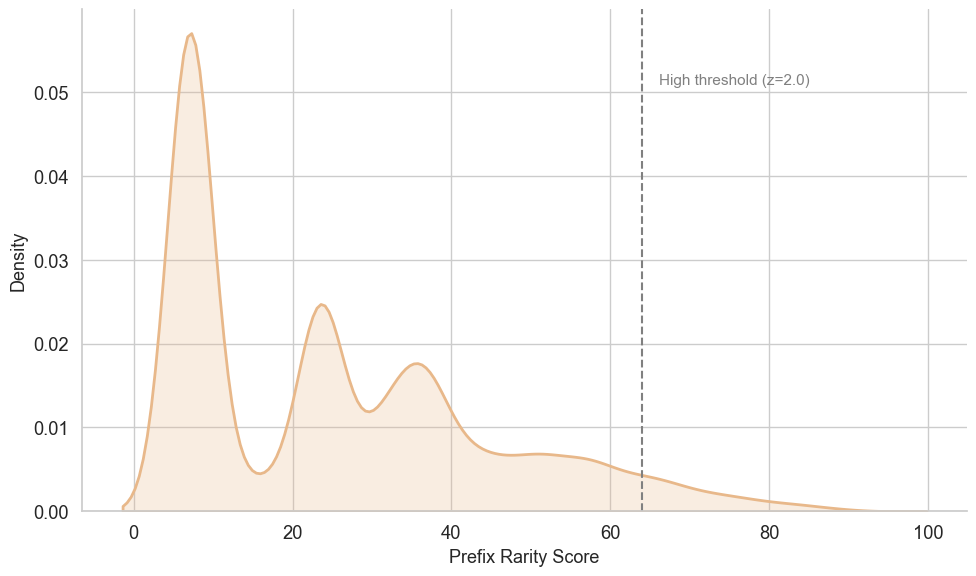


Á§∫‰æã4ÔºöÊºîÁ§∫‰∏âÁªÑÂØπÊØîÁöÑÂèØËÉΩÊÄß


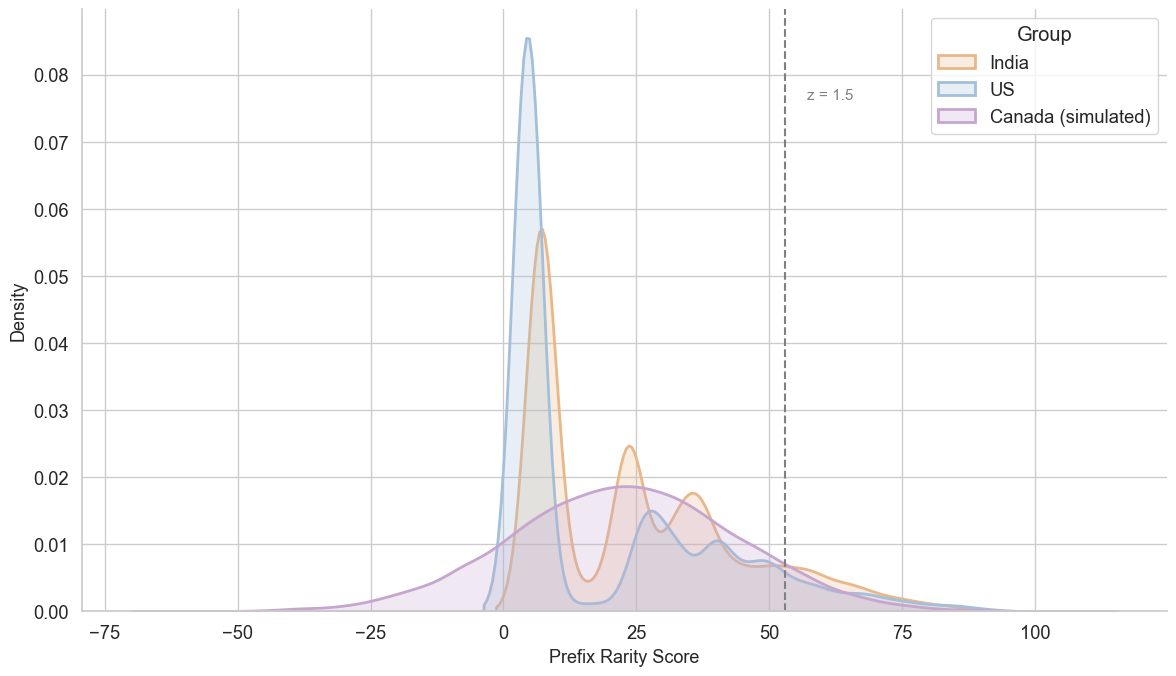

‚úÖ ÊâÄÊúâÁ§∫‰æãÂÆåÊàêÔºÅ


In [11]:
# Á§∫‰æã2ÔºöÊó†ÈòàÂÄºÁ∫øÔºåÁÆÄÊ¥ÅÂØπÊØî
print("Á§∫‰æã2Ôºö‰∏çÊòæÁ§∫ÈòàÂÄºÁ∫ø")
plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=False,  # ÂÖ≥Èó≠ÈòàÂÄºÁ∫ø
    # save_as="rarity_distribution_clean"
)

# Á§∫‰æã3ÔºöÂçïÁªÑÂàÜÊûê
print("\nÁ§∫‰æã3ÔºöÂçïÁªÑÂàÜÊûêÔºà‰ªÖÂç∞Â∫¶Ôºâ")
plot_prefix_rarity_distribution(
    data=india_df["prefix_rarity_score"].tolist(),
    group_names=["India"],
    colors=["#E8B88A"],
    show_threshold=True,
    z_threshold=2.0,  # ‰∏çÂêåÁöÑÈòàÂÄº
    threshold_label="High threshold (z=2.0)",  # Ëá™ÂÆö‰πâÊ†áÁ≠æ
    # save_as="india_only_analysis"
)

# Á§∫‰æã4Ôºö‰∏âÁªÑÂØπÊØîÔºàÂ¶ÇÊûúÊúâÁ¨¨‰∏â‰∏™ÂõΩÂÆ∂ÁöÑÊï∞ÊçÆÔºâ
print("\nÁ§∫‰æã4ÔºöÊºîÁ§∫‰∏âÁªÑÂØπÊØîÁöÑÂèØËÉΩÊÄß")
# ËøôÈáåÁî®Ê®°ÊãüÊï∞ÊçÆÊºîÁ§∫
import numpy as np
np.random.seed(42)
simulated_canada = np.random.normal(
    loc=np.mean(india_df["prefix_rarity_score"]) * 0.9, 
    scale=np.std(india_df["prefix_rarity_score"]) * 1.1, 
    size=len(india_df)
)

three_groups = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist(),
    "Canada (simulated)": simulated_canada.tolist()
}

plot_prefix_rarity_distribution(
    data=three_groups,
    show_threshold=True,
    z_threshold=1.5,
    figsize=(12, 7),  # Á®çÂ§ßÁöÑÂõæ
    # save_as="three_countries_comparison"
)

print("‚úÖ ÊâÄÊúâÁ§∫‰æãÂÆåÊàêÔºÅ")


Path Uniqueness ÁÆ±Á∫øÂõæ + StripÔºàÂ±ïÁ§∫ÊûÅÁ´Ø‰∏™‰ΩìÔºâ

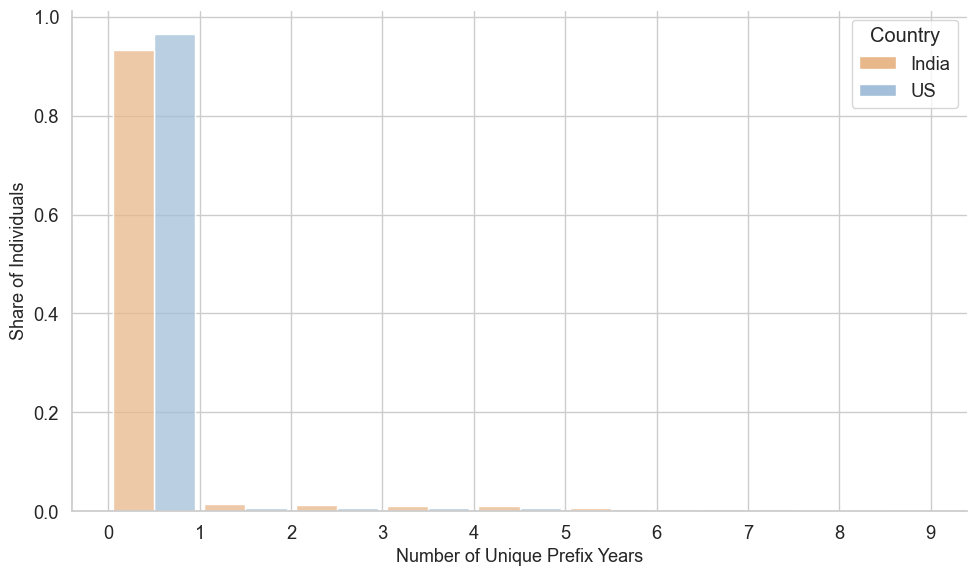

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆÈ£éÊ†º‰∏éÂ≠ó‰ΩìÊØî‰æãÔºàÂíåÂâçÂõæ‰∏ÄËá¥Ôºâ
sns.set(style="whitegrid", font_scale=1.2)

# ËÆæÁΩÆÈ¢úËâ≤ÔºàËé´Â•àÊüîËâ≤Ë∞ÉÔºâ
india_color = "#E8B88A"
us_color = "#A3BFD9"
palette = {"India": india_color, "US": us_color}

# Á°Æ‰øùÂõΩÂÆ∂Â≠óÊÆµÊòØÂ§ßÂÜôÊ†áÁ≠æÔºà‰∏éÂõæ‰æã‰∏ÄËá¥Ôºâ
df["country"] = df["country"].str.strip().str.title().replace({"Us": "US", "India": "India"})

# ÂàõÂª∫ÁîªÂ∏É
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=df,
    x="path_uniqueness",
    hue="country",
    multiple="dodge",
    binwidth=1,
    shrink=0.9,
    palette=palette,
    stat="probability",    # üëà ÊòæÁ§∫ share ËÄå‰∏çÊòØ density
    common_norm=False,     # üëà ÊØèÁªÑÂçïÁã¨ÂΩí‰∏ÄÂåñ
    ax=ax
)

# ÊâãÂä®‰øÆÂ§ç legend
from matplotlib.patches import Patch

custom_legend = [
    Patch(facecolor="#E8B88A", label="India"),
    Patch(facecolor="#A3BFD9", label="US")
]
ax.legend(handles=custom_legend, title="Country")

# ËÆæÁΩÆÊ†áÁ≠æ‰∏éÊ†∑Âºè
ax.set_xlabel("Number of Unique Prefix Years", fontsize=13)
ax.set_ylabel("Share of Individuals", fontsize=13)
# ax.set_title("Distribution of Path Uniqueness by Country", fontsize=15)
ax.set_xticks(range(0, df["path_uniqueness"].max() + 1))
# plt.legend(title="Country")
sns.despine()
plt.tight_layout()

# ‰øùÂ≠ò & ÊòæÁ§∫
plt.savefig("Path Uniqueness Distribution by Country", dpi=300, bbox_inches='tight')
plt.show()


In [13]:
for country in ['India', 'US']:
    
    country_df = df[df['country']==country]
    
    print(f'{country} - full sample size, {country_df.shape[0]}')
    
    print(country)

    print(country_df['diverged'].value_counts())

India - full sample size, 15113
India
diverged
0    11921
1     3192
Name: count, dtype: int64
US - full sample size, 23789
US
diverged
0    19066
1     4723
Name: count, dtype: int64


Á§∫‰æã1ÔºöÊï¥‰ΩìÁõ∏ÂÖ≥ÊÄßÂàÜÊûê


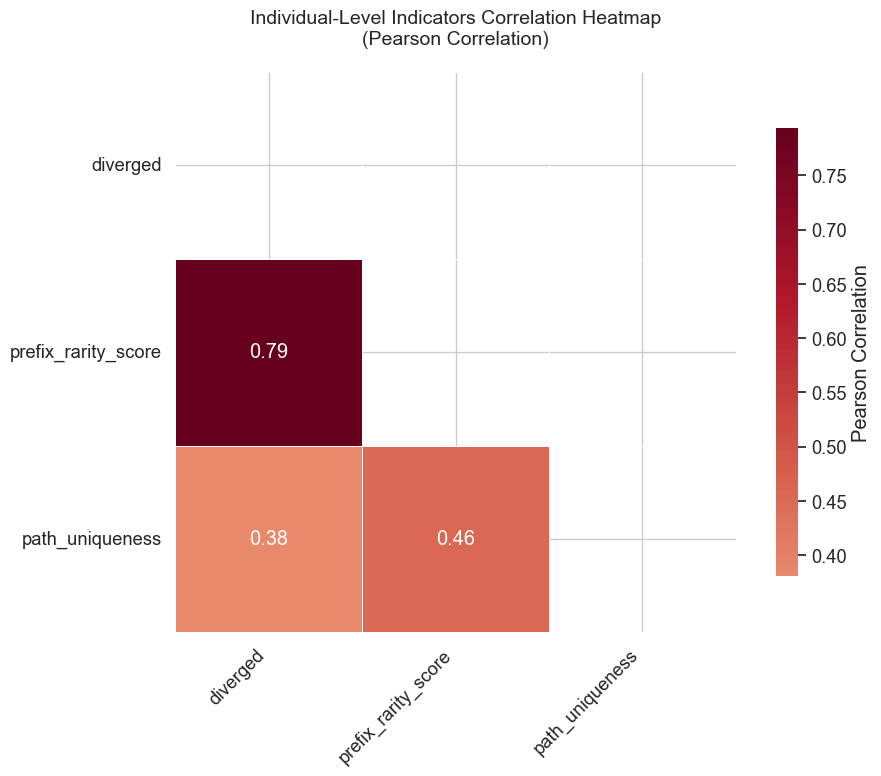

üìä Ê£ÄÊµãÂà∞ÁöÑÊåáÊ†á: ['diverged', 'prefix_rarity_score', 'path_uniqueness']
üìä Ê†∑Êú¨Â§ßÂ∞è: 38902


In [14]:
# üî• Êñ∞ÂäüËÉΩÔºö‰∏™‰ΩìÂ±ÇÊåáÊ†áÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæÔºÅ
# ÊºîÁ§∫ plot_individual_indicators_correlation ÁöÑÂêÑÁßçÁî®Ê≥ï

from sequenzo import plot_individual_indicators_correlation

# Á§∫‰æã1ÔºöÊï¥‰ΩìÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæÔºàÊâÄÊúâ‰∏™‰ΩìÔºâ
print("Á§∫‰æã1ÔºöÊï¥‰ΩìÁõ∏ÂÖ≥ÊÄßÂàÜÊûê")
corr_results = plot_individual_indicators_correlation(
    df,
    save_as="overall_indicators_correlation"
)

print("üìä Ê£ÄÊµãÂà∞ÁöÑÊåáÊ†á:", corr_results['summary']['indicators_included'])
print("üìä Ê†∑Êú¨Â§ßÂ∞è:", corr_results['summary']['sample_size'])



Á§∫‰æã2ÔºöÊåâÂõΩÂÆ∂ÂàÜÁªÑÁöÑÁõ∏ÂÖ≥ÊÄßÂàÜÊûê


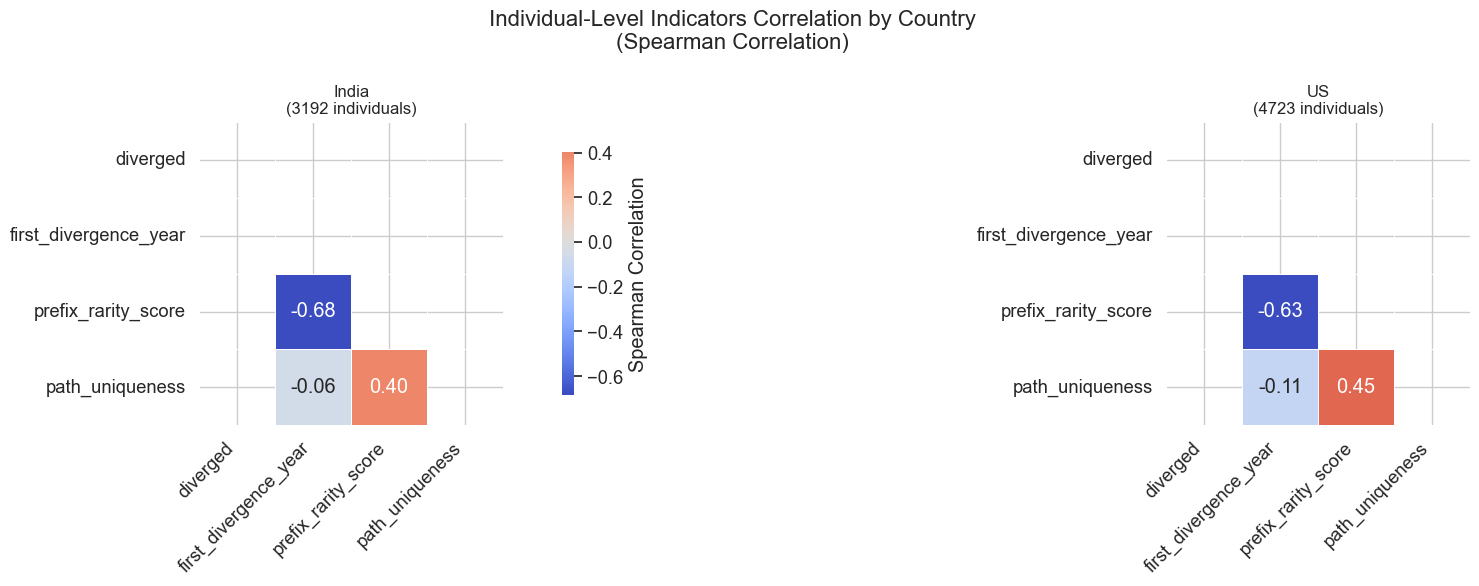

üìä ÂêÑÂõΩÊ†∑Êú¨Â§ßÂ∞è: {'India': 3192, 'US': 4723}

Á§∫‰æã3ÔºöÂè™ÂàÜÊûêÊ†∏ÂøÉÊåáÊ†á


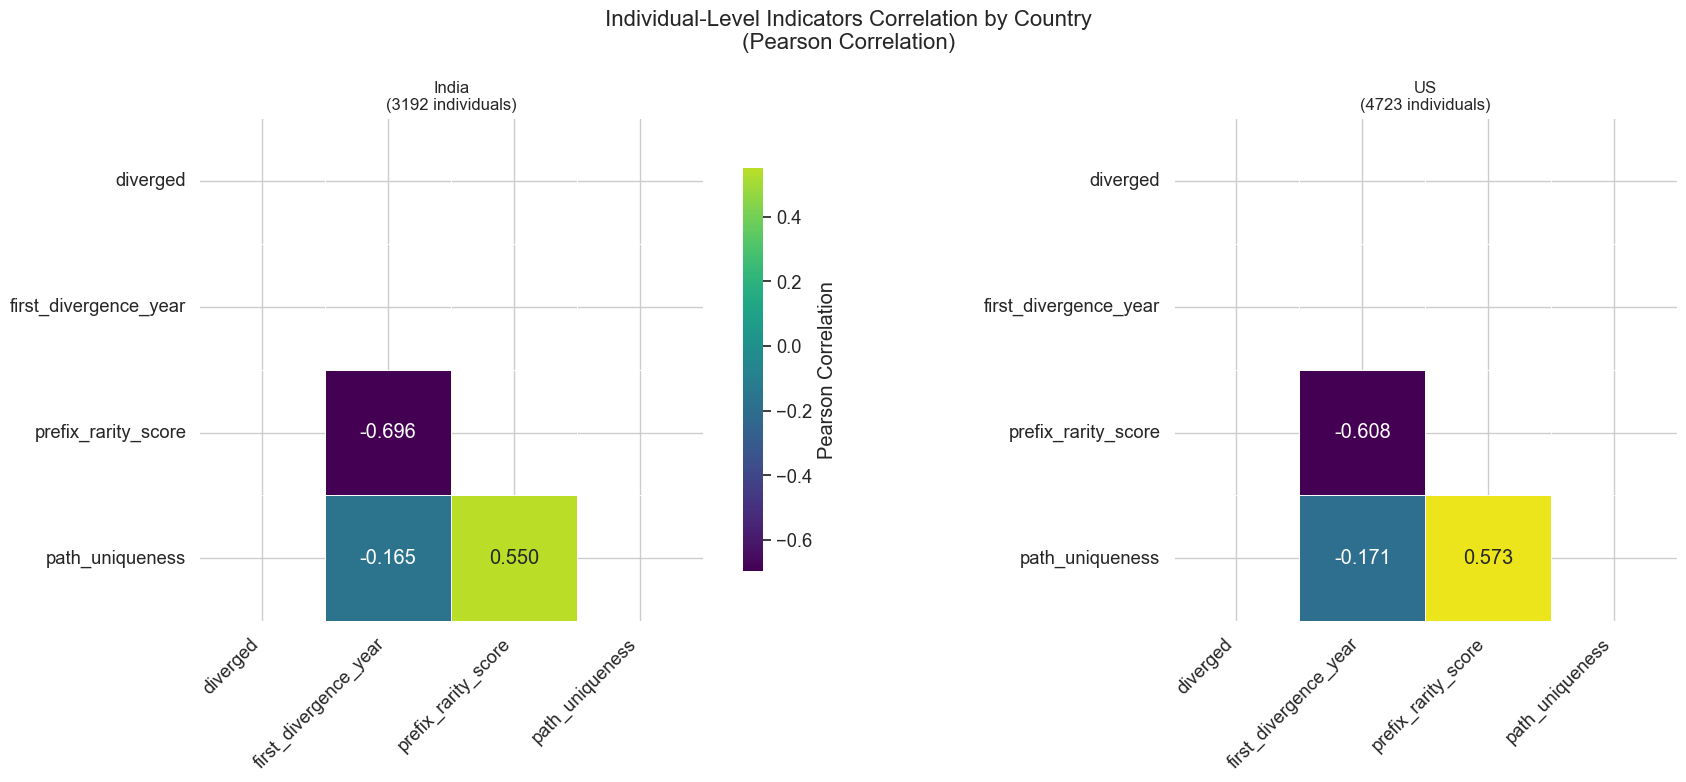


Á§∫‰æã4ÔºöÂ≠¶ÊúØÂèëË°®Á∫ßÂà´ÁöÑÁæéËßÇÁÉ≠ÂäõÂõæ


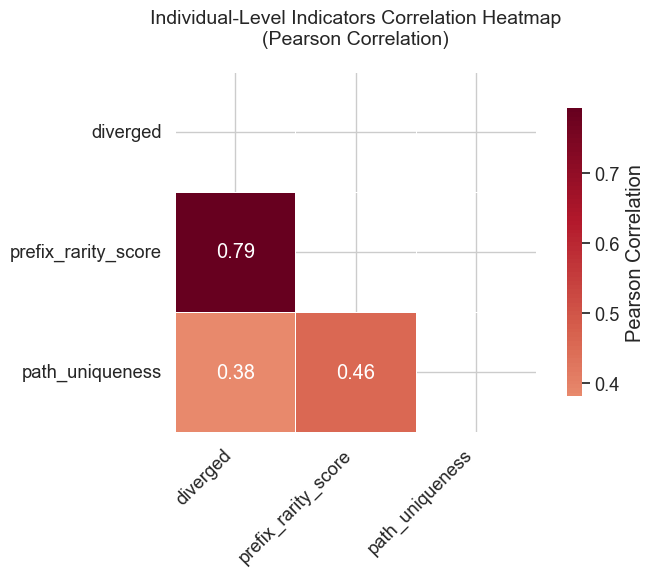

‚úÖ ÊâÄÊúâÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÂÆåÊàêÔºÅ


In [15]:
# Á§∫‰æã2ÔºöÊåâÂõΩÂÆ∂ÂàÜÁªÑÁöÑÁõ∏ÂÖ≥ÊÄßÂØπÊØîÔºàÊúÄÈáçË¶ÅÁöÑÁî®Ê≥ïÔºÅÔºâ
print("\nÁ§∫‰æã2ÔºöÊåâÂõΩÂÆ∂ÂàÜÁªÑÁöÑÁõ∏ÂÖ≥ÊÄßÂàÜÊûê")
country_corr_results = plot_individual_indicators_correlation(
    df,
    group_column='country',  # ÊåâÂõΩÂÆ∂ÂàÜÁªÑ
    correlation_method='spearman',  # ‰ΩøÁî®SpearmanÁõ∏ÂÖ≥Á≥ªÊï∞ÔºàÂØπÈùûÊ≠£ÊÄÅÂàÜÂ∏ÉÊõ¥È≤ÅÊ£íÔºâ
    cmap='coolwarm',  # ‰ΩøÁî®ÂÜ∑ÊöñÈÖçËâ≤
    figsize=(12, 6),  # Êõ¥ÂÆΩÁöÑÂõæÂÉè‰ª•ÂÆπÁ∫≥‰∏§‰∏™Â≠êÂõæ
    save_as="country_indicators_correlation"
)

print("üìä ÂêÑÂõΩÊ†∑Êú¨Â§ßÂ∞è:", country_corr_results['summary']['sample_size'])

# Á§∫‰æã3ÔºöËá™ÂÆö‰πâÊåáÊ†áÈÄâÊã©
print("\nÁ§∫‰æã3ÔºöÂè™ÂàÜÊûêÊ†∏ÂøÉÊåáÊ†á")
core_indicators = ['diverged', 'first_divergence_year', 'prefix_rarity_score', 'path_uniqueness']
core_corr_results = plot_individual_indicators_correlation(
    df,
    indicator_columns=core_indicators,
    group_column='country',
    cmap='viridis',  # ‰ΩøÁî®ÁßëÂ≠¶ÈÖçËâ≤
    annot=True,
    fmt='.3f',  # ÊòæÁ§∫3‰ΩçÂ∞èÊï∞
    save_as="core_indicators_correlation"
)

# Á§∫‰æã4ÔºöÈ´òÁ´ØÁæéÂ≠¶ÁâàÊú¨ÔºàÂ≠¶ÊúØÂèëË°®Á∫ßÂà´Ôºâ
print("\nÁ§∫‰æã4ÔºöÂ≠¶ÊúØÂèëË°®Á∫ßÂà´ÁöÑÁæéËßÇÁÉ≠ÂäõÂõæ")
academic_corr = plot_individual_indicators_correlation(
    df,
    indicator_columns=core_indicators,
    correlation_method='pearson',
    cmap='RdBu_r',  # ÁªèÂÖ∏ÁöÑÁ∫¢ËìùÈÖçËâ≤
    center=0,  # ‰ª•0‰∏∫‰∏≠ÂøÉ
    annot=True,
    fmt='.2f',
    figsize=(8, 6),
    save_as="academic_correlation_heatmap"
)

print("‚úÖ ÊâÄÊúâÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÂÆåÊàêÔºÅ")


## üé® `plot_individual_indicators_correlation` ÂäüËÉΩËØ¥Êòé

### üéØ Ê†∏ÂøÉÂäüËÉΩ
Ëøô‰∏™ÂáΩÊï∞ÂèØ‰ª•ÂàõÂª∫**‰∏™‰ΩìÂ±ÇÊåáÊ†á‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ**ÔºåÂ∏ÆÂä©‰Ω†ÁêÜËß£‰∏çÂêåÊåáÊ†á‰πãÈó¥ÁöÑÂÖ≥Á≥ªÊ®°Âºè„ÄÇ

### üìä ‰∏ªË¶ÅÁâπÊÄß

#### **1. Êô∫ËÉΩÊåáÊ†áÊ£ÄÊµã**
- Ëá™Âä®ËØÜÂà´Â∏∏ËßÅÁöÑ‰∏™‰ΩìÂ±ÇÊåáÊ†áÔºà`diverged`, `prefix_rarity_score`, `path_uniqueness` Á≠âÔºâ
- ÊîØÊåÅÊâãÂä®ÊåáÂÆöÊåáÊ†áÂàóË°®

#### **2. ÂàÜÁªÑÂØπÊØîÂàÜÊûê**
- **Êï¥‰ΩìÂàÜÊûê**ÔºöÊâÄÊúâ‰∏™‰ΩìÁöÑÊï¥‰ΩìÁõ∏ÂÖ≥ÊÄß
- **ÂàÜÁªÑÂØπÊØî**ÔºöÊåâÂõΩÂÆ∂„ÄÅÊÄßÂà´Á≠âÂèòÈáèÂàÜÁªÑÊØîËæÉ

#### **3. Â§öÁßçÁõ∏ÂÖ≥Á≥ªÊï∞**
- `pearson`ÔºöÁ∫øÊÄßÁõ∏ÂÖ≥ÔºàÈªòËÆ§Ôºâ
- `spearman`ÔºöÁß©Áõ∏ÂÖ≥ÔºàÂØπÂºÇÂ∏∏ÂÄºÈ≤ÅÊ£íÔºâ
- `kendall`ÔºöÈùûÂèÇÊï∞Áõ∏ÂÖ≥

#### **4. ÁæéËßÇÁöÑÂèØËßÜÂåñ**
- Â§öÁßçÈÖçËâ≤ÊñπÊ°àÔºö`RdBu_r`ÔºàÁ∫¢ËìùÔºâ„ÄÅ`coolwarm`„ÄÅ`viridis`„ÄÅ`plasma`
- ‰∏ä‰∏âËßíÈÅÆÁΩ©ÔºàÈÅøÂÖçÈáçÂ§ç‰ø°ÊÅØÔºâ
- ÂèØÈÄâÁöÑÊï∞ÂÄºÊ†áÊ≥®
- Â≠¶ÊúØÂèëË°®Á∫ßÂà´ÁöÑÁæéËßÇÂ∫¶

#### **5. ÂÆûÁî®ÂäüËÉΩ**
- Ëá™Âä®Â§ÑÁêÜÁº∫Â§±ÂÄº
- ËøîÂõûÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ‰æõËøõ‰∏ÄÊ≠•ÂàÜÊûê
- ÊîØÊåÅ‰øùÂ≠òÈ´òÂàÜËæ®ÁéáÂõæÂÉè
- Êèê‰æõËØ¶ÁªÜÁöÑÁªüËÆ°ÊëòË¶Å

### üî• Êé®ËçêÁî®Ê≥ï

```python
# ÊúÄÂÆûÁî®ÔºöÊåâÂõΩÂÆ∂ÂàÜÁªÑÂØπÊØî
plot_individual_indicators_correlation(
    df, 
    group_column='country',
    correlation_method='spearman',
    save_as="country_comparison"
)

# Â≠¶ÊúØÂèëË°®ÔºöÈÄâÊã©Ê†∏ÂøÉÊåáÊ†á
plot_individual_indicators_correlation(
    df,
    indicator_columns=['diverged', 'prefix_rarity_score', 'path_uniqueness'],
    cmap='RdBu_r',
    save_as="core_indicators"
)
```

### üìà ÂàÜÊûêÊÑè‰πâ
- **Ê≠£Áõ∏ÂÖ≥**ÔºöÊåáÊ†áÂêåÂêëÂèòÂåñÔºàÂ¶ÇÂàÜÊ≠ß‰∏™‰ΩìÈÄöÂ∏∏ÊúâÊõ¥È´òÁöÑÁ®ÄÊúâÊÄßÂàÜÊï∞Ôºâ
- **Ë¥üÁõ∏ÂÖ≥**ÔºöÊåáÊ†áÂèçÂêëÂèòÂåñ
- **ÂàÜÁªÑÂ∑ÆÂºÇ**Ôºö‰∏çÂêåÂõΩÂÆ∂/Áæ§‰ΩìÁöÑÊåáÊ†áÂÖ≥Á≥ªÊ®°ÂºèÂ∑ÆÂºÇ


In [16]:
df.rename(columns={f"C{i}": str(i) for i in range(1, 11)}, inplace=True)

In [ ]:
# üîç ÈÄêÊ≠•Ë∞ÉËØï DataFrame ÂêàÂπ∂ÈóÆÈ¢ò - ÊâæÂá∫‰∏∫‰ªÄ‰πà df ÊòØÁ©∫ÁöÑ
print("=== üïµÔ∏è Ë∞ÉËØïÂºÄÂßã ===")

# 1. Ê£ÄÊü•‰∏ªÊï∞ÊçÆÊñá‰ª∂
print("üìÅ Ê£ÄÊü•‰∏ªÊï∞ÊçÆÊñá‰ª∂ df.csv...")
try:
    df_main = pd.read_csv("df.csv")
    print(f"‚úÖ df_main ËØªÂèñÊàêÂäü")
    print(f"üìä df_main ÂΩ¢Áä∂: {df_main.shape}")
    print(f"üîë df_main ÂàóÂêçÂâç10‰∏™: {list(df_main.columns)[:10]}")
    
    if 'worker_id' in df_main.columns:
        print(f"üÜî df_main ‰∏≠ worker_id ÁöÑÂîØ‰∏ÄÂÄºÊï∞Èáè: {df_main['worker_id'].nunique()}")
        print(f"üìä df_main worker_id Ê†∑‰æã: {df_main['worker_id'].head().tolist()}")
        print(f"üîç df_main worker_id Êï∞ÊçÆÁ±ªÂûã: {df_main['worker_id'].dtype}")
    else:
        print("‚ùå df_main ‰∏≠Ê≤°Êúâ worker_id ÂàóÔºÅ")
        
    if 'country' in df_main.columns:
        print(f"üåç df_main ‰∏≠ÁöÑ country ÂîØ‰∏ÄÂÄº: {df_main['country'].unique()}")
    else:
        print("‚ùå df_main ‰∏≠Ê≤°Êúâ country ÂàóÔºÅ")
        
except Exception as e:
    print(f"‚ùå ËØªÂèñ df_main Â§±Ë¥•: {e}")
    df_main = None

print("\\n" + "="*50)

# 2. Ê£ÄÊü•ÊéßÂà∂ÂèòÈáèÊñá‰ª∂
print("üìÅ Ê£ÄÊü•ÊéßÂà∂ÂèòÈáèÊñá‰ª∂...")
try:
    controls = pd.read_csv("/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data/df_final_encoded_categorical_levels.csv")
    print(f"‚úÖ controls ËØªÂèñÊàêÂäü")
    print(f"üìä controls ÂΩ¢Áä∂: {controls.shape}")
    print(f"üîë controls ÂàóÂêçÂâç10‰∏™: {list(controls.columns)[:10]}")
    
    # ÈáçÂëΩÂêçÂàó
    controls.rename(columns={f"C{i}": str(i) for i in range(1, 11)}, inplace=True)
    
    # Ê∏ÖÁêÜÊéßÂà∂ÂèòÈáè
    controls = controls.drop(columns=["organization_type", "num_followers", "industry"], errors="ignore")
    print(f"üìä Ê∏ÖÁêÜÂêé controls ÂΩ¢Áä∂: {controls.shape}")
    
    if 'worker_id' in controls.columns:
        print(f"üÜî controls ‰∏≠ worker_id ÁöÑÂîØ‰∏ÄÂÄºÊï∞Èáè: {controls['worker_id'].nunique()}")
        print(f"üìä controls worker_id Ê†∑‰æã: {controls['worker_id'].head().tolist()}")
        print(f"üîç controls worker_id Êï∞ÊçÆÁ±ªÂûã: {controls['worker_id'].dtype}")
    else:
        print("‚ùå controls ‰∏≠Ê≤°Êúâ worker_id ÂàóÔºÅ")
        
except Exception as e:
    print(f"‚ùå ËØªÂèñ controls Â§±Ë¥•: {e}")
    controls = None

print("\\n" + "="*50)


In [ ]:
# 3. Ê£ÄÊü•ÂêàÂπ∂ËøáÁ®ã
if df_main is not None and controls is not None and 'worker_id' in df_main.columns and 'worker_id' in controls.columns:
    print("üîó Ê£ÄÊü•‰∏§‰∏™Êï∞ÊçÆÈõÜÁöÑ‰∫§ÈõÜ...")
    
    # Ê£ÄÊü•ÂÖ±ÂêåÁöÑ worker_id
    df_main_ids = set(df_main['worker_id'].dropna())
    controls_ids = set(controls['worker_id'].dropna())
    common_ids = df_main_ids.intersection(controls_ids)
    
    print(f"üìä df_main ‰∏≠ÁöÑ worker_id Êï∞Èáè: {len(df_main_ids)}")
    print(f"üìä controls ‰∏≠ÁöÑ worker_id Êï∞Èáè: {len(controls_ids)}")
    print(f"üîó ÂÖ±ÂêåÁöÑ worker_id Êï∞Èáè: {len(common_ids)}")
    
    if len(common_ids) == 0:
        print("‚ùå Ê≤°ÊúâÂÖ±ÂêåÁöÑ worker_idÔºÅËøôÂ∞±ÊòØÈóÆÈ¢òÊâÄÂú®ÔºÅ")
        print("\\nüîç Ëøõ‰∏ÄÊ≠•ÂàÜÊûê:")
        print(f"üìã df_main worker_id Ââç5‰∏™: {list(df_main_ids)[:5]}")
        print(f"üìã controls worker_id Ââç5‰∏™: {list(controls_ids)[:5]}")
        
        # Ê£ÄÊü•Êï∞ÊçÆÊ†ºÂºèÂ∑ÆÂºÇ
        if len(df_main_ids) > 0 and len(controls_ids) > 0:
            sample_main = list(df_main_ids)[0]
            sample_controls = list(controls_ids)[0]
            print(f"\\nüîç Êï∞ÊçÆÊ†ºÂºèÊØîËæÉ:")
            print(f"df_main Ê†∑‰æã: '{sample_main}' (Á±ªÂûã: {type(sample_main)})")
            print(f"controls Ê†∑‰æã: '{sample_controls}' (Á±ªÂûã: {type(sample_controls)})")
    else:
        print(f"‚úÖ ÊâæÂà∞ {len(common_ids)} ‰∏™ÂÖ±ÂêåÁöÑ worker_id")
        
        # ÊâßË°åÂêàÂπ∂
        print("\\nüîÑ ÊâßË°åÂêàÂπ∂...")
        df_merged = df_main.merge(controls, on="worker_id", how="inner")
        print(f"‚úÖ ÂêàÂπ∂ÂêéÂΩ¢Áä∂: {df_merged.shape}")
        
        if df_merged.shape[0] > 0:
            # Ê£ÄÊü•ÂõΩÂÆ∂ËøáÊª§
            if 'country' in df_merged.columns:
                print(f"\\nüåç ÂêàÂπ∂ÂêéÁöÑ country ÂîØ‰∏ÄÂÄº: {df_merged['country'].unique()}")
                df_filtered = df_merged[df_merged["country"].isin(["india", "us"])].copy()
                print(f"üéØ ÂõΩÂÆ∂ËøáÊª§ÂêéÂΩ¢Áä∂: {df_filtered.shape}")
                
                if df_filtered.shape[0] == 0:
                    print("‚ùå ÂõΩÂÆ∂ËøáÊª§Âêé‰∏∫Á©∫ÔºÅÂèØËÉΩcountryÂàóÁöÑÂÄº‰∏çÊòØ 'india' Êàñ 'us'")
                else:
                    print(f"‚úÖ ÊúÄÁªàÊï∞ÊçÆÈõÜÂΩ¢Áä∂: {df_filtered.shape}")
                    print(f"üìä ÊúÄÁªàÂàóÂêç: {list(df_filtered.columns)}")
            else:
                print("‚ùå ÂêàÂπ∂ÂêéÁöÑÊï∞ÊçÆ‰∏≠Ê≤°Êúâ country ÂàóÔºÅ")
        else:
            print("‚ùå ÂêàÂπ∂Âêé‰∏∫Á©∫ÔºÅ")
else:
    print("‚ùå Êó†Ê≥ïËøõË°åÂêàÂπ∂Ê£ÄÊü•ÔºåÂõ†‰∏∫Êï∞ÊçÆËØªÂèñÂ§±Ë¥•ÊàñÁº∫Â∞ëÂøÖË¶ÅÁöÑÂàó")

print("\\n=== üïµÔ∏è Ë∞ÉËØïÁªìÊùü ===")
print("\\nüí° Ëß£ÂÜ≥Âª∫ËÆÆ:")
print("1. Â¶ÇÊûúÊ≤°ÊúâÂÖ±ÂêåÁöÑ worker_idÔºåÊ£ÄÊü•‰∏§‰∏™Êñá‰ª∂‰∏≠ÁöÑ worker_id Ê†ºÂºèÊòØÂê¶‰∏ÄËá¥")
print("2. Â¶ÇÊûú country ÂÄº‰∏çÂåπÈÖçÔºåÊ£ÄÊü• country ÂàóÁöÑÂÆûÈôÖÂÄº")
print("3. Á°ÆËÆ§‰∏§‰∏™ CSV Êñá‰ª∂Ë∑ØÂæÑÊòØÂê¶Ê≠£Á°Æ‰∏îÊñá‰ª∂Â≠òÂú®")


In [17]:
df

worker_id  gender country                  cohort  \
0          dilip-kumar-nath-7538746a    male   India  11-20 total work years   
1         vinodkumar-yadav-b7a976107    male   India  11-20 total work years   
2               josh-slosson-07a1509    male   India  11-20 total work years   
3      jonatthan-rodriguez-8a5612121    male   India  11-20 total work years   
4       jeenesh-jyothindran-8ba28818    male   India  11-20 total work years   
...                              ...     ...     ...                     ...   
38897             nan-jiang-743a9863  female      US   0-10 total work years   
38898              tina-pava-4846207  female      US  21-30 total work years   
38899                     sariandoni  female      US  21-30 total work years   
38900            nancy-jain-a8723460  female      US   0-10 total work years   
38901       christy-garner-677894213  female      US  21-30 total work years   

                    1               2               3               4  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
38897        software        software        software        software   
38898        software        software        software        software   
38899  support & test        software        software        software   
38900        software        software        software        software   
38901  support & test  support & test  support & test  support & test   

                    5               6               7               8  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
38897        software        software        software        software   
38898        software        software        software        software   
38899        software        software        software        research   
38900        software  support & test        software        software   
38901  support & test  support & test  support & test  support & test   

                    9              10  diverged  first_divergence_year  \
0            software        software         0                    NaN   
1            software        software         0                    NaN   
2            software        software         0                    NaN   
3            software        software         0                    NaN   
4            software        software         0                    NaN   
...               ...             ...       ...                    ...   
38897        software        software         0                    NaN   
38898        software        software         0                    NaN   
38899        research        research         1                    3.0   
38900        software        software         1                    6.0   
38901  support & test  support & test         0                    NaN   

       prefix_rarity_score  path_uniqueness  
0                 7.070030                0  
1                 7.070030                0  
2                 7.070030                0  
3                 7.070030                0  
4                 7.070030                0  
...                    ...              ...  
38897             4.528812                0  
38898             4.528812                0  
38899    

In [18]:
df.to_csv('df.csv', index=False)

-------------India-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 15113
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
[>] Labels: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


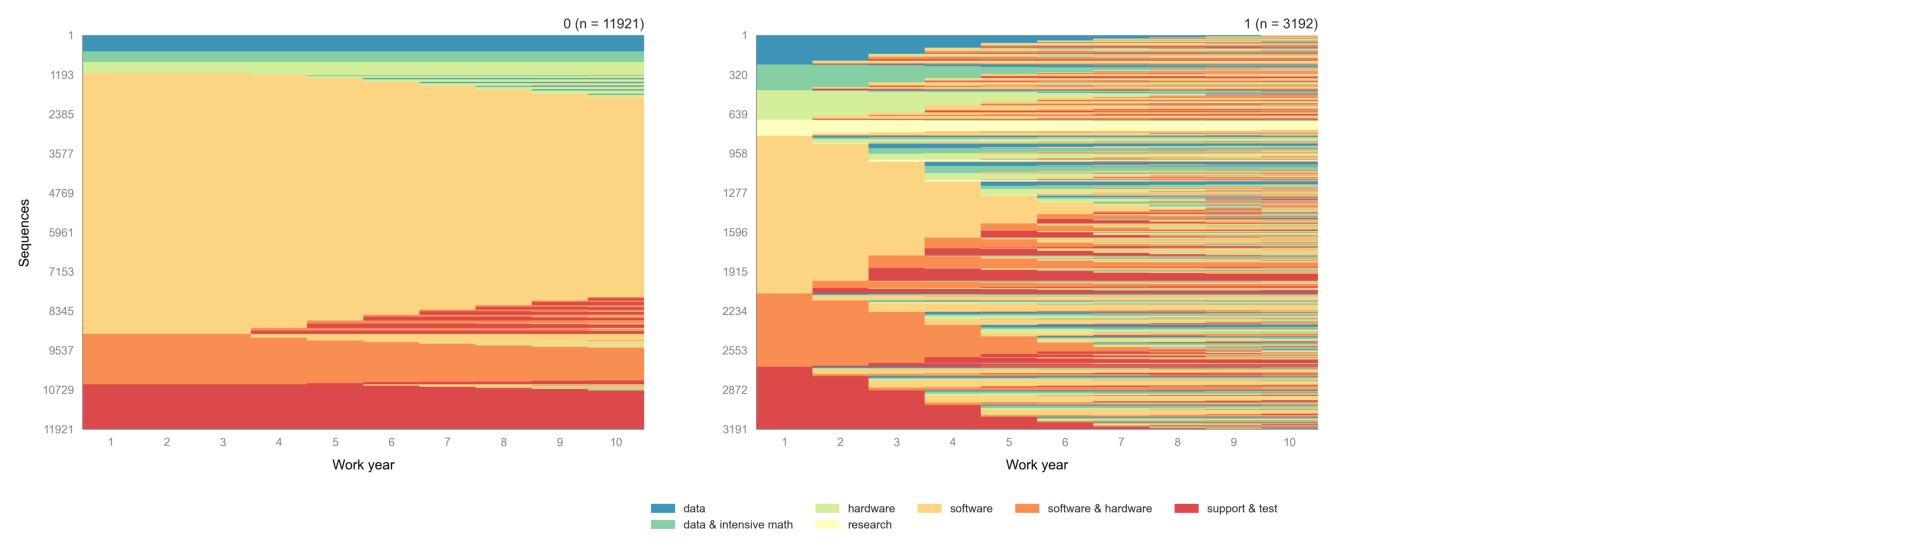

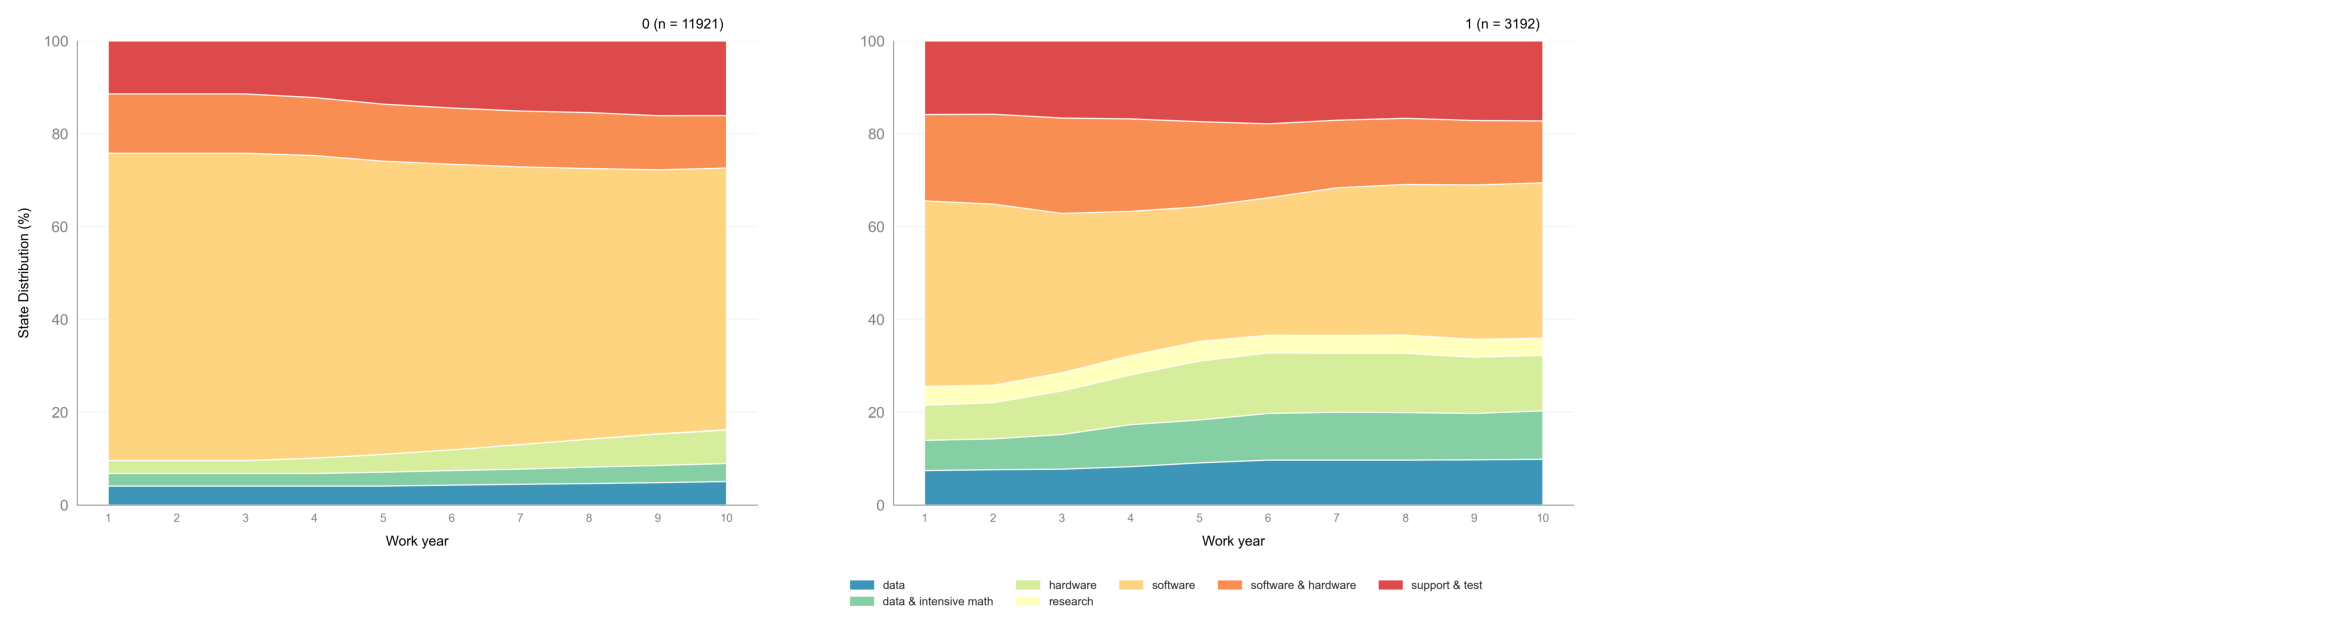

-------------US-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 23789
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
[>] Labels: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


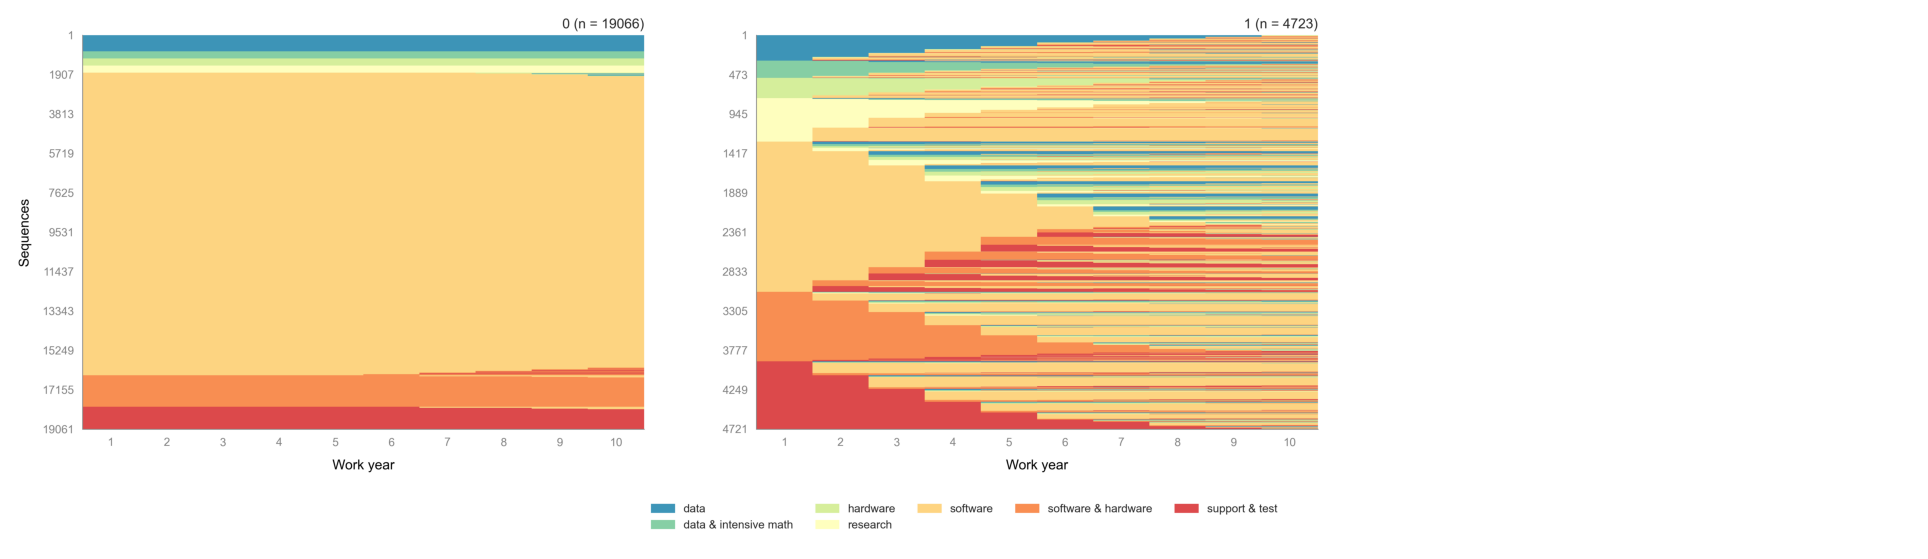

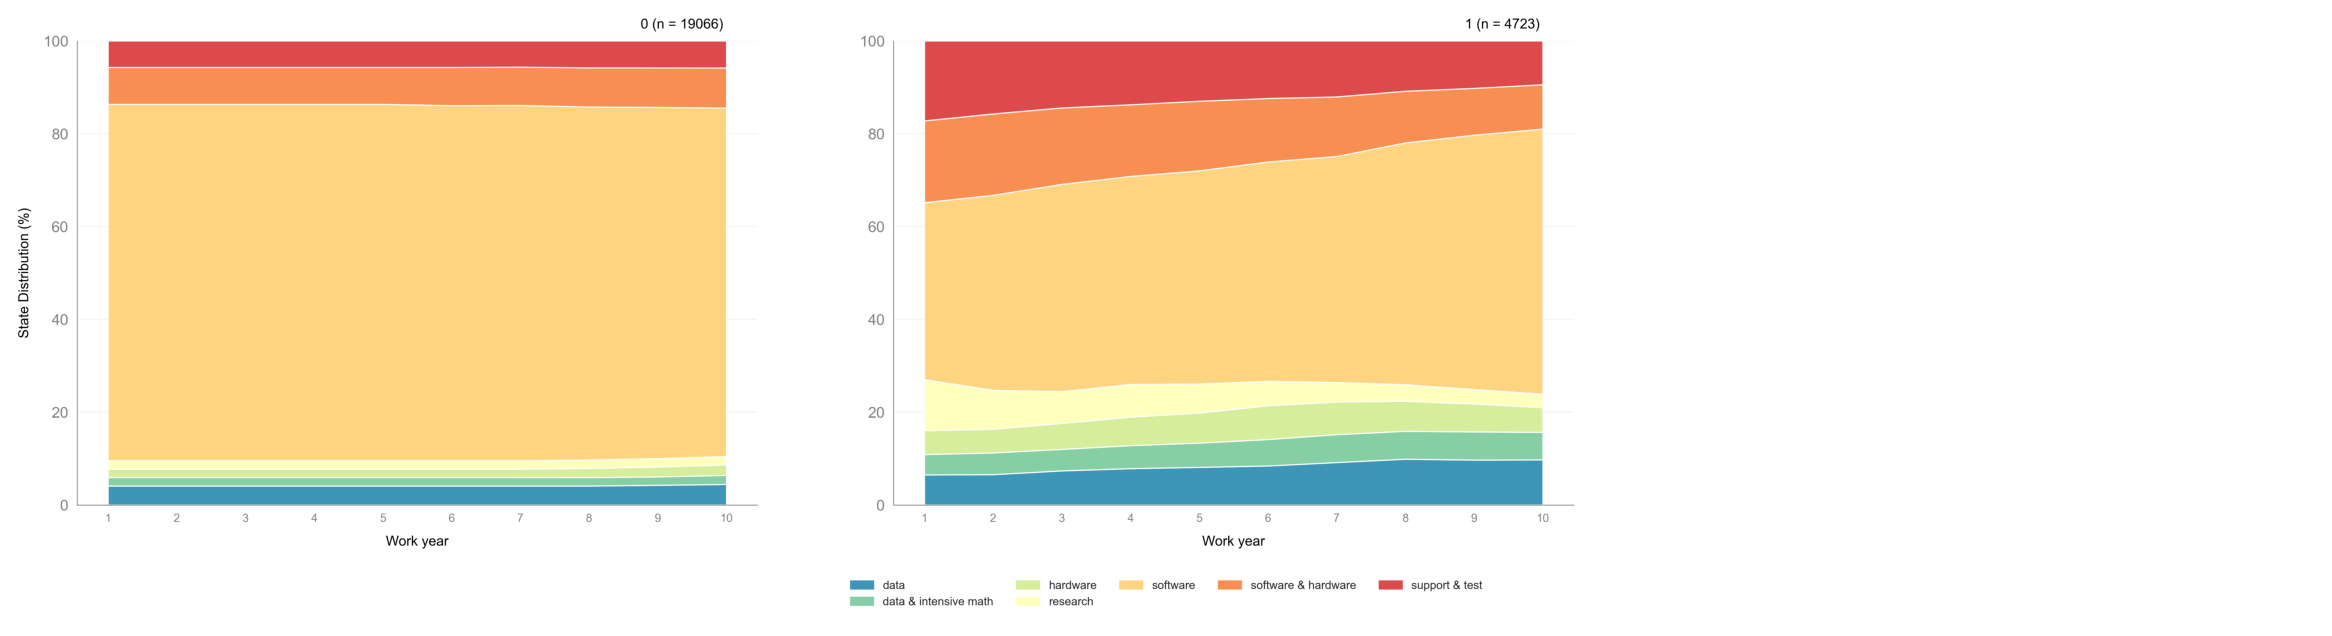

In [19]:
def by_country_plotting_sequences(country_name, country_dataframe):
    from sequenzo import SequenceData
    from sequenzo.visualization import plot_sequence_index
    
    time_cols = [str(i) for i in range(1, 11)]
    state_list = sorted(country_dataframe[time_cols].stack().dropna().unique().tolist())  # e.g. ['data', 'hardware', ...]
    
    seq = SequenceData(
        data=country_dataframe,
        id_col="worker_id",
        time=time_cols,
        states=state_list,
        time_type="year",
    )
    
    plot_sequence_index(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # ÂèØÈÄâÊéíÂ∫èÊñπÂºè
        save_as=f"{country_name}_diverged_vs_mainstream_index_plot.png",
        dpi=300,
        xlabel="Work year"
    )
    
    plot_state_distribution(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # ÂèØÈÄâÊéíÂ∫èÊñπÂºè
        save_as=f"{country_name}_diverged_vs_mainstream_state_distribution_plot.png",
        dpi=300,
        xlabel="Work year"
    )


for country in ['India', 'US']:
    print(f'-------------{country}-------------')
    country_df = df[df['country'] == country]
    by_country_plotting_sequences(country, country_df)
    

In [26]:
import pandas as pd
import statsmodels.formula.api as smf

# Êñá‰ª∂Ë∑ØÂæÑ
df_main = pd.read_csv("df.csv")  # ÂåÖÂê´ divergence ÊåáÊ†á
controls = pd.read_csv("/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data/df_final_encoded_categorical_levels.csv",
                       index_col=0)

# Ê∏ÖÁêÜÊéßÂà∂ÂèòÈáè
controls = controls.drop(columns=["organization_type", "num_followers", "industry", "company_size"], errors="ignore")

# ÂêàÂπ∂‰∏ªË°® + ÊéßÂà∂ÂèòÈáè
df = df_main.merge(controls, on="worker_id", how="inner")

# df
# Ê∏ÖÁêÜ‰∏éËΩ¨Êç¢
# df = df[df["country"].isin(["india", "us"])].copy()
df["gender"] = df["gender"].astype("category")
df["cohort"] = df["cohort"].astype("category")
df["country"] = df["country"].astype("category")

# ÊïôËÇ≤ÂàÜÁ±ªÂêàÂπ∂
df["highest_educational_degree"] = df["highest_educational_degree"].replace(
    {"PhD": "Advanced Degree", "Master": "Advanced Degree"}
)

df

worker_id  gender country                  cohort  \
0          dilip-kumar-nath-7538746a    male   India  11-20 total work years   
1         vinodkumar-yadav-b7a976107    male   India  11-20 total work years   
2               josh-slosson-07a1509    male   India  11-20 total work years   
3      jonatthan-rodriguez-8a5612121    male   India  11-20 total work years   
4       jeenesh-jyothindran-8ba28818    male   India  11-20 total work years   
...                              ...     ...     ...                     ...   
32626                 michelle-elder  female      US  21-30 total work years   
32627             nan-jiang-743a9863  female      US   0-10 total work years   
32628              tina-pava-4846207  female      US  21-30 total work years   
32629                     sariandoni  female      US  21-30 total work years   
32630       christy-garner-677894213  female      US  21-30 total work years   

                    1               2               3               4  \
0            software        software        software        software   
1            software        software        software        software   
2            software        software        software        software   
3            software        software        software        software   
4            software        software        software        software   
...               ...             ...             ...             ...   
32626        software        software        software        software   
32627        software        software        software        software   
32628        software        software        software        software   
32629  support & test        software        software        software   
32630  support & test  support & test  support & test  support & test   

                    5               6  ... diverged first_divergence_year  \
0            software        software  ...        0                   NaN   
1            software        software  ...        0                   NaN   
2            software        software  ...        0                   NaN   
3            software        software  ...        0                   NaN   
4            software        software  ...        0                   NaN   
...               ...             ...  ...      ...                   ...   
32626        software        software  ...        0                   NaN   
32627        software        software  ...        0                   NaN   
32628        software        software  ...        0                   NaN   
32629        software        software  ...        1                   3.0   
32630  support & test  support & test  ...        0                   NaN   

      prefix_rarity_score path_uniqueness  highest_educational_degree  \
0                7.070030               0                    Bachelor   
1                7.070030               0                    Bachelor   
2                7.070030               0                    Bachelor   
3                7.070030               0                    Bachelor   
4                7.070030               0                    Bachelor   
...                   ...             ...                         ...   
32626           26.687441               0                    Bachelor   
32627            4.528812               0             Advanced Degree   
32628            4.528812               0                    Bachelor   
32629           64.726362               3             Advanced Degree   
32630           29.082828               0                    Bachelor   

       whether_bachelor_university_prestigious  internationalization  \
0                                        False         Multinational   
1                                        False                 Local   
2                                        False         International   
3                                        False         Multinational   
4                          